In [2]:
import trimesh
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import numpy as np
import rhino3dm
import requests  # pip install requests

def mesh_to_trimesh():
    # get file NYC_3DModel_MN01.3dm from local folder
    model = rhino3dm.File3dm.Read("NYC_3DModel_MN01.3dm")

    for obj in model.Objects:
            geometry = obj.Geometry
            if isinstance(geometry, rhino3dm.Brep):
                brep = geometry
                face = brep.Faces[0]
                mesh = face.GetMesh(rhino3dm.MeshType.Any)
                # print (len(mesh.Faces))
                print(mesh)

    return

def load_2():
    scene = trimesh.load("NYC_3DModel_MN01.3dm")

# combined_vertices = load()
# vertices_array = np.array(combined_vertices)
# trimesh_obj = trimesh.Trimesh(vertices=vertices_array)

#  trimesh_obj = trimesh.Trimesh(vertices=combined_vertices)
# combined_mesh = trimesh.util.concatenate(combined_mesh)


In [3]:
def load_model(file_name):
     return rhino3dm.File3dm.Read(file_name)

file_name = r"data\cities\NYC_3DModel_MN05.3dm"
model = load_model(file_name)

In [11]:
def process_3dm(model):
    combined_vertices = []

    for obj in model.Objects:
        geometry = obj.Geometry
        if isinstance(geometry, rhino3dm.Brep):
            brep = geometry
            faces = brep.Faces
            
            for face in faces:
                mesh = face.GetMesh(rhino3dm.MeshType.Any)
                vertices = [[vertex.X, vertex.Y, vertex.Z] for vertex in mesh.Vertices]
                for vertex in vertices:
                    combined_vertices.append(vertex)
        # if isinstance(geometry, rhino3dm.PolylineCurve):
        #     polylinecurve = geometry
        #     point_count = polylinecurve.PointCount
        #     for i in range(point_count):
        #         point = polylinecurve.Point(i)
        #         # print(point.X, point.Y, point.Z)
        #         combined_vertices.append([point.X, point.Y, point.Z])
            # return
            # vertices = [[vertex.X, vertex.Y, vertex.Z] for vertex in polylinecurve.Points]
            # for vertex in vertices:
            #     combined_vertices.append(vertex)


    return combined_vertices

vertices = process_3dm(model)

In [12]:
# normalized_vertices = np.array(vertices)
# # for each axis, subtract the min value
# normalized_vertices -= normalized_vertices.min(axis=0)

# print(normalized_vertices)

normalized_vertices = np.array(vertices)

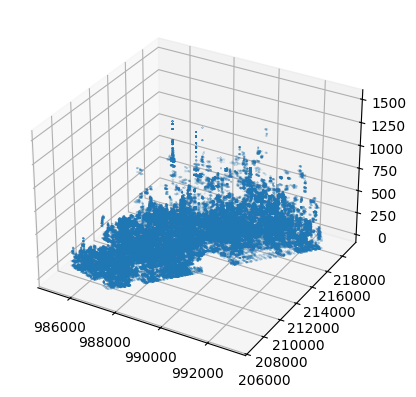

In [13]:
# plot vertices in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normalized_vertices[:,0], normalized_vertices[:,1], normalized_vertices[:,2], s=0.001)  # Adjust the value of 's' to make the points smaller
plt.show()


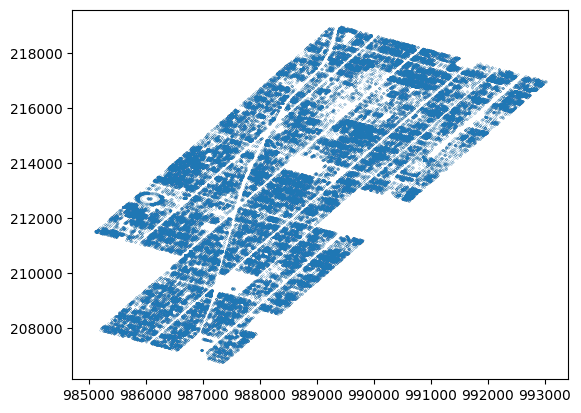

In [14]:
# plot from a top down view
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(normalized_vertices[:,0], normalized_vertices[:,1], s=0.001)  # Adjust the value of 's' to make the points smaller
plt.show()
